In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then look at the top few rows.

In [2]:
#Now let's get and put the data in  pandas dataframe

order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

Firstly, let's explore order_products_train and order_products_prior files. These files specify which products were purchased in each order. More specifically, order_products__prior contains previous order contents for all customers and order_products_train contains the last orders for some customers only.

In [3]:
print("The order_products_train size is (row, column) : ", order_products_train.shape)
print("The order_products_prior size is (row, column)  : ", order_products_prior.shape)

The order_products_train size is (row, column) :  (1384617, 4)
The order_products_prior size is (row, column)  :  (32434489, 4)


In [4]:
#display first five rows.
order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
#Now, let's concatenate them in the same order_products dataframe.
order_products_all = pd.concat([order_products_train, order_products_prior], axis=0)
order_products_all.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
# Missing data
total = order_products_all.isnull().sum().sort_values(ascending=False)
percent = (order_products_all.isnull().sum()/order_products_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
reordered,0,0.0
add_to_cart_order,0,0.0
product_id,0,0.0
order_id,0,0.0


In [8]:
#There is no missing data in order_products_all dataset.

In [9]:
# Check the number of unique orders and unique products
orders_Unique = len(set(order_products_all.order_id))
products_Unique = len(set(order_products_all.product_id))
print("There are %s orders for %s products" %(orders_Unique, products_Unique))

There are 3346083 orders for 49685 products


## Number of products that people usually order :

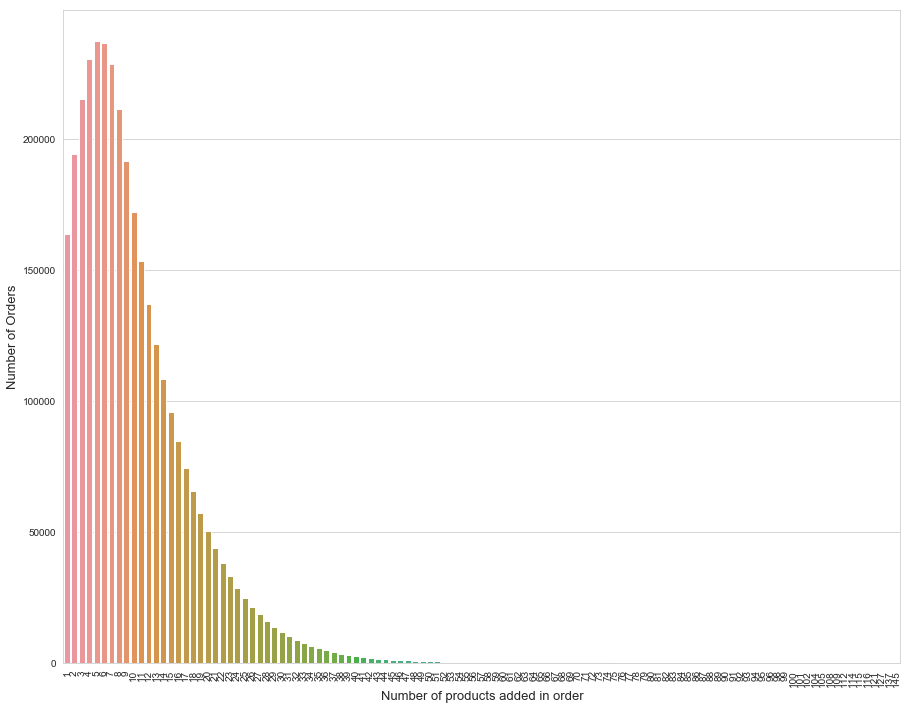

<Figure size 432x288 with 0 Axes>

In [10]:

grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()
plt.tight_layout()

In [11]:
# We can observe that people usually order around 5 products.

## Now let's identify which products are ordered the most.

In [12]:
grouped = order_products_all.groupby('product_id')['reordered'].aggregate('count').reset_index()

In [13]:
order_products_all.groupby('product_id')['reordered'].count().reset_index().head()

,product_id,reordered
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16


In [14]:
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on='product_id')

In [15]:
grouped = grouped.sort_values(by='reordered', ascending=False).head(15)

In [16]:
# Fruits like banana , strawberries...are the most ordered products.

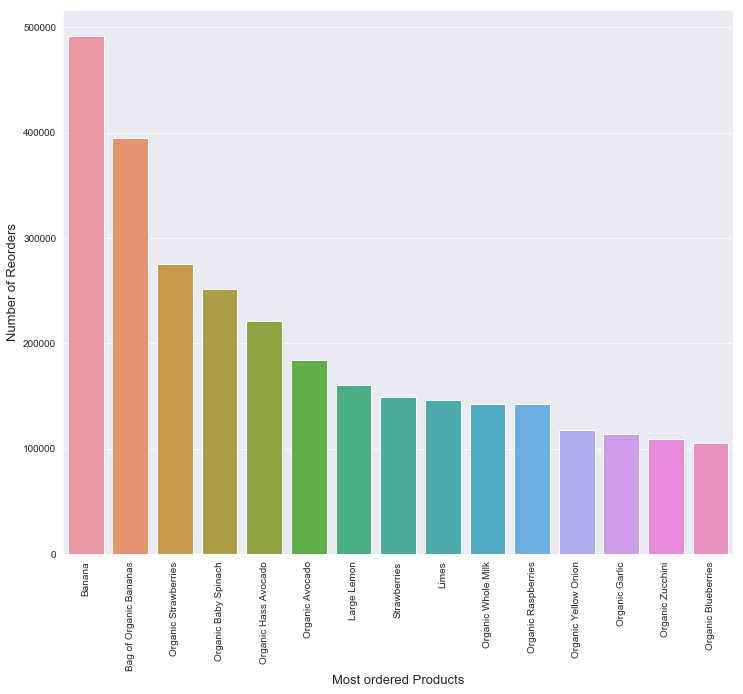

In [17]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.product_name, grouped.reordered)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

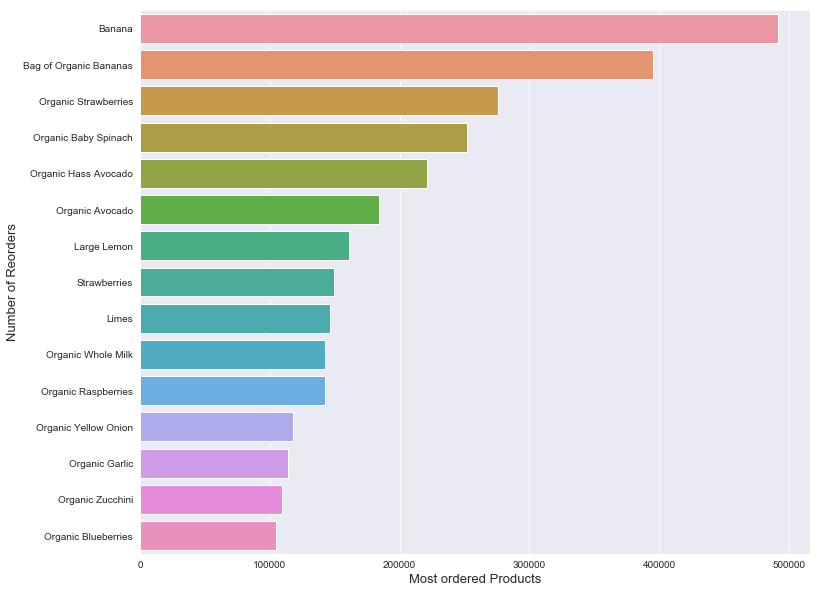

In [18]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(grouped.reordered, grouped.product_name)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

## Do people usually reorder the same previous ordered products ?

In [19]:
grouped = order_products_all.groupby("reordered")["product_id"].count().reset_index()

In [20]:
grouped

,reordered,product_id
0,0,13863746
1,1,19955360


In [21]:
grouped['Ratios'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratios
0,0,13863746,0.409938
1,1,19955360,0.590062


In [22]:
# 59% of ordered products are previously ordered by customers.

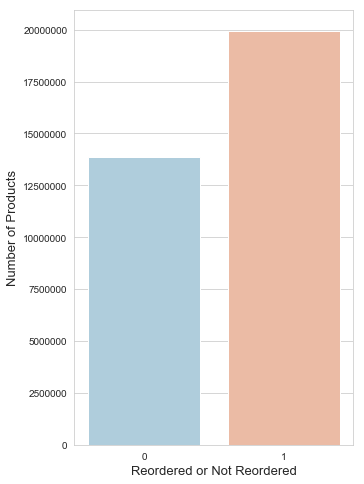

In [23]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.reordered, grouped.product_id, palette='RdBu_r')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered or Not Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Most Reordered Products
## Which products are usually reordered ?

In [25]:
order_products_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [26]:
reordered_sum = order_products_all.groupby('product_id')['reordered'].sum().reset_index()
reordered_count = order_products_all.groupby('product_id')['reordered'].count().reset_index()

In [27]:
grouped = pd.merge(reordered_sum, products[['product_id', 'product_name']],
                   how= 'left', on=['product_id'])

In [28]:
grouped = grouped.merge(reordered_count,how='left', on='product_id', suffixes=('_sum', '_count'))

In [29]:
grouped['reordered_ratio'] = grouped.reordered_sum / grouped.reordered_count

In [30]:
# our columns don't look so organized so let rearrange some columns
grouped.columns.values.tolist()

['product_id',
 'reordered_sum',
 'product_name',
 'reordered_count',
 'reordered_ratio']

In [31]:
new_order = ['product_id',
 'product_name',
 'reordered_sum',
 'reordered_count',
 'reordered_ratio']

In [32]:
grouped = grouped[new_order]

In [33]:
grouped.head()

,product_id,product_name,reordered_sum,reordered_count,reordered_ratio
0,1,Chocolate Sandwich Cookies,1185,1928,0.614627
1,2,All-Seasons Salt,13,94,0.138298
2,3,Robust Golden Unsweetened Oolong Tea,209,283,0.738516
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,161,351,0.458689
4,5,Green Chile Anytime Sauce,10,16,0.625000


In [34]:
grouped.sort_values('reordered_ratio', ascending=False, inplace=True)
grouped[:10]

,product_id,product_name,reordered_sum,reordered_count,reordered_ratio
6431,6433,Raw Veggie Wrappers,65,69,0.942029
2074,2075,Serenity Ultimate Extrema Overnight Pads,84,90,0.933333
43550,43553,Orange Energy Shots,12,13,0.923077
27737,27740,Chocolate Love Bar,94,102,0.921569
14606,14609,Soy Powder Infant Formula,32,35,0.914286
13872,13875,Simply Sleep Nighttime Sleep Aid,41,45,0.911111
39989,39992,"Energy Shot, Grape Flavor",20,22,0.909091
5866,5868,Russian River Valley Reserve Pinot Noir,27,30,0.900000
36540,36543,Bars Peanut Butter,62,69,0.898551
26090,26093,Soy Crisps Lightly Salted,60,67,0.895522


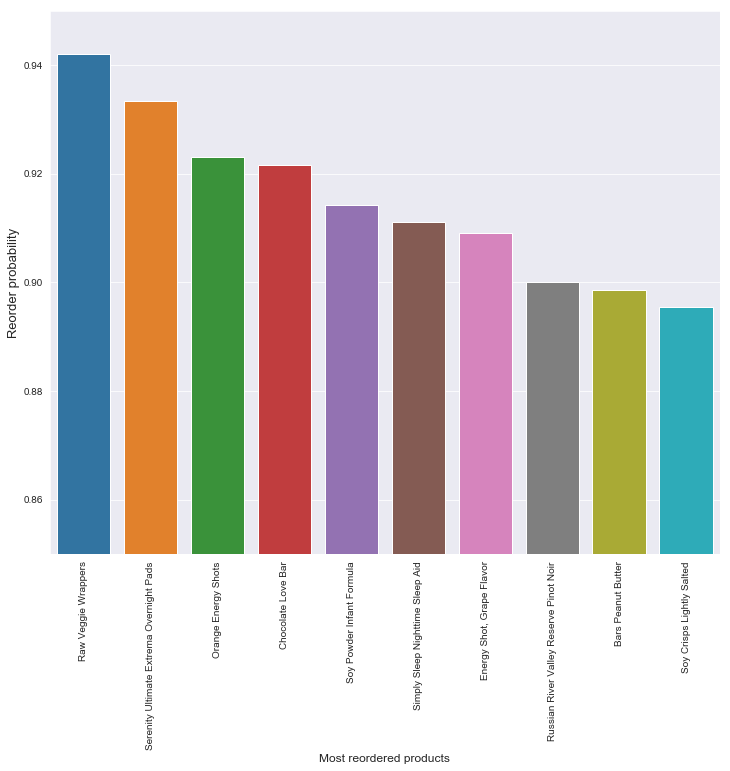

In [59]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sns.barplot(grouped.product_name[:10], grouped.reordered_ratio[:10])
plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()

In [61]:
# Let's explore now the orders.csv file

In [63]:
print("The orders data size is : ", orders.shape)

The orders data size is :  (3421083, 7)


In [73]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [64]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [65]:
# Missing data
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [75]:
orders_na = (orders.isnull().sum() / len(orders)) * 100
orders_na

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

In [76]:
# The only feature with missing values is days_since_prior_order with 6.028 % missing

## Time of orders
## Time at which people usually order products.

In [85]:
time_orders = orders.groupby('order_id').head()

In [92]:
orders.order_hour_of_day.value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

Text(0.5,0,'Hours of order in a day')

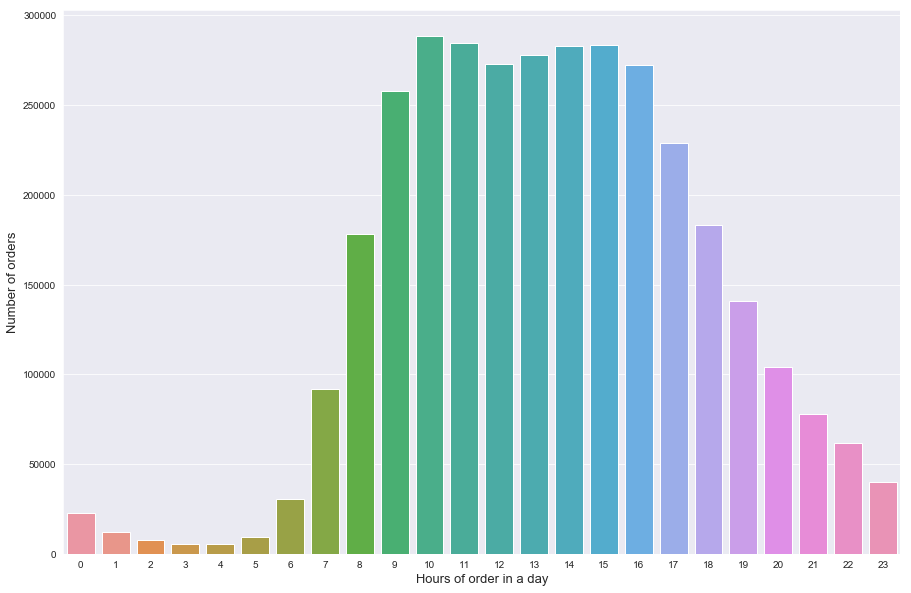

In [95]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(orders.order_hour_of_day.value_counts().index, orders.order_hour_of_day.value_counts().values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)

In [96]:
# People mostly order between 8am and 19pm

## Days of Orders in a week:

In [98]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


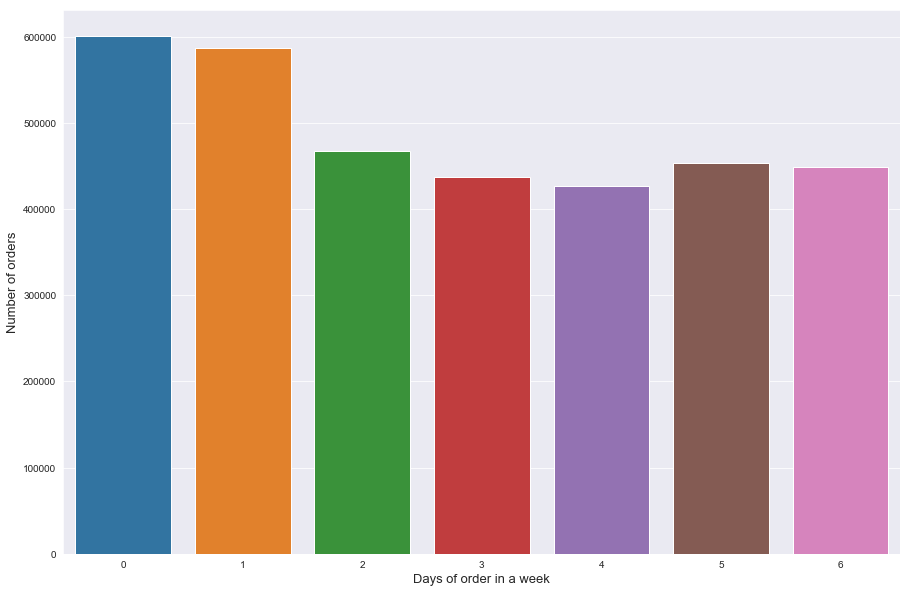

In [100]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(orders.order_dow.value_counts().index, orders.order_dow.value_counts().values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

In [101]:
# People usually order at days 0 and 1 
# 0 - Sun      Sunday
# 1 - Mon      Monday
# 2 - Tue      Tuesday
# 3 - Wed      Wednesday
# 4 - Thu      Thursday
# 5 - Fri      Friday
# 6 - Sat      Saturday
# 7 - Sun      Sunday

## Period of Reorders:

In [103]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [104]:
orders.days_since_prior_order.value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

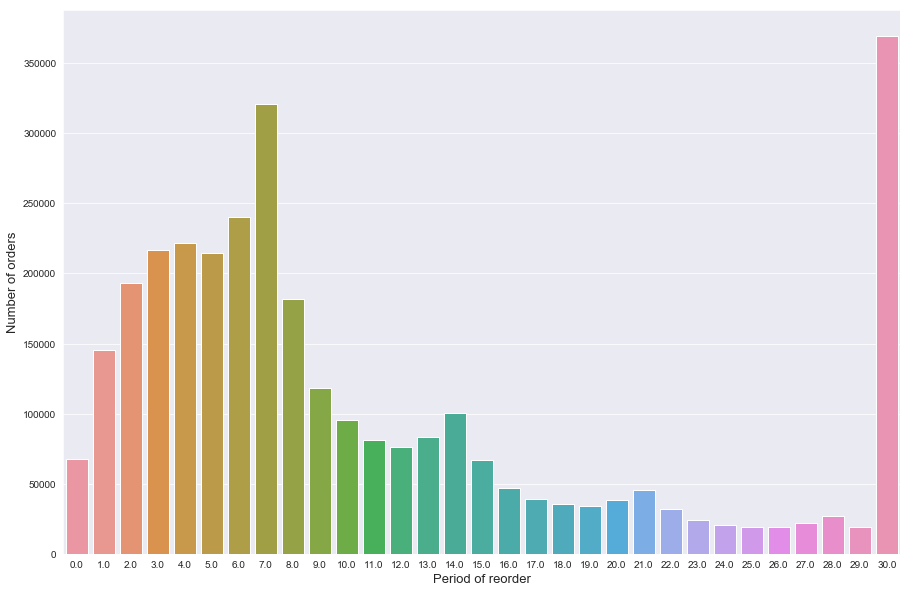

In [105]:
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(orders.days_since_prior_order.value_counts().index, orders.days_since_prior_order.value_counts().values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

In [106]:
# People usually reorder either after 1 week or after 1 month.

## Now let's explore the items datasets (products, departments and aisles files.)

In [107]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [108]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [109]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [110]:
# Now let's combine them in a single dataframe

In [111]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


## Most important Departments (by number of products)

In [112]:
items.department.value_counts()

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64

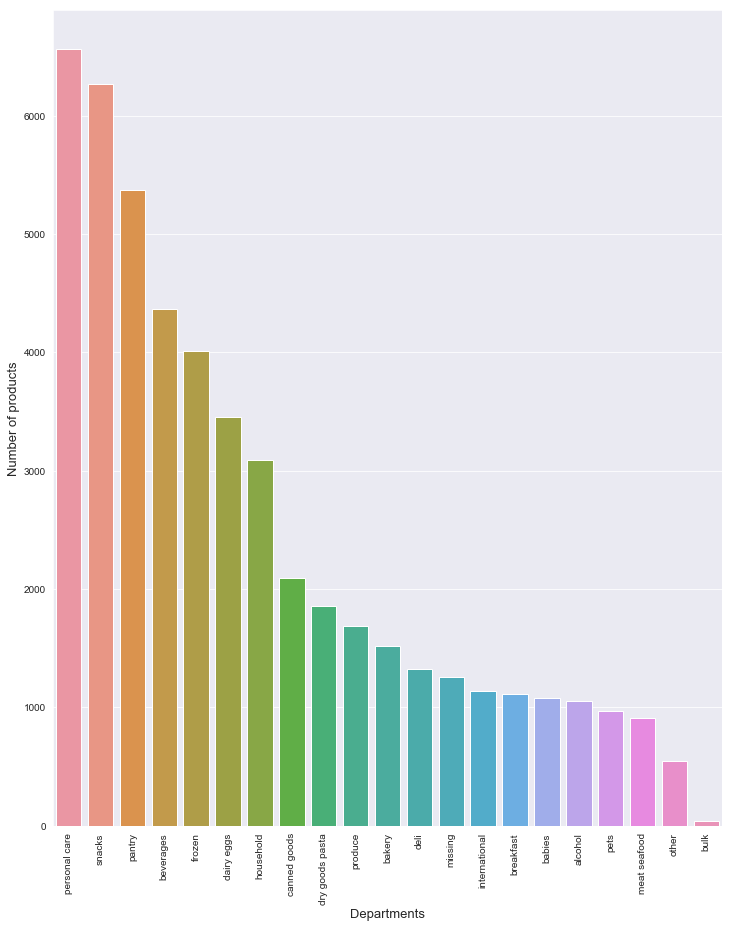

In [118]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(items.department.value_counts().index, items.department.value_counts().values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

In [119]:
# personal care dept has the most products in store

## Most important Aisles over all Departments (by number of Products)

In [120]:
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [123]:
aisle_product_count = items.aisle.value_counts()[:20]

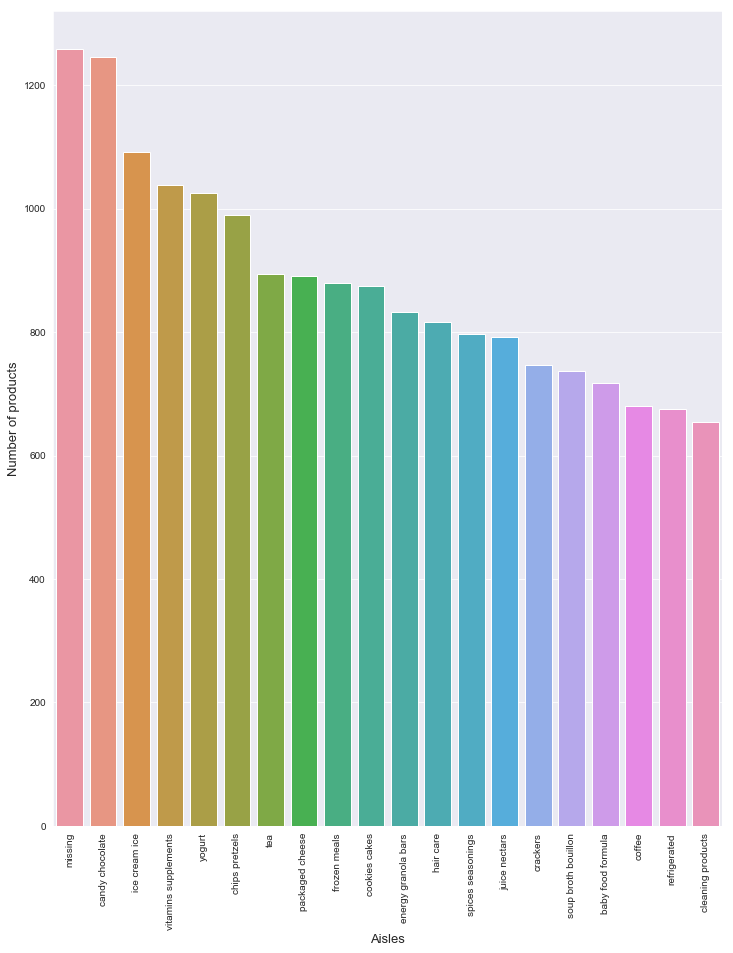

In [127]:
f, ax = plt.subplots(figsize=(12, 15))
sns.barplot(aisle_product_count.index, aisle_product_count.values)
plt.xticks(rotation = '90')
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

In [130]:
# suprisingly there is a 'missing' aisle which has the most number of products

In [131]:
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [132]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Best Selling Departments (number of Orders)


In [134]:
order_products_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [135]:
best_selling_depts = pd.merge(left=items, right= order_products_all, on='product_id', how='inner')

In [136]:
best_selling_depts.head()

,product_id,product_name,aisle_id,department_id,department,aisle,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,240996,3,1


In [150]:
dept_sell_count = best_selling_depts.groupby('department')['order_id'].count().sort_values(ascending= False)

In [151]:
dept_sell_count.head()

department
produce       9888378
dairy eggs    5631067
snacks        3006412
beverages     2804175
frozen        2336858
Name: order_id, dtype: int64

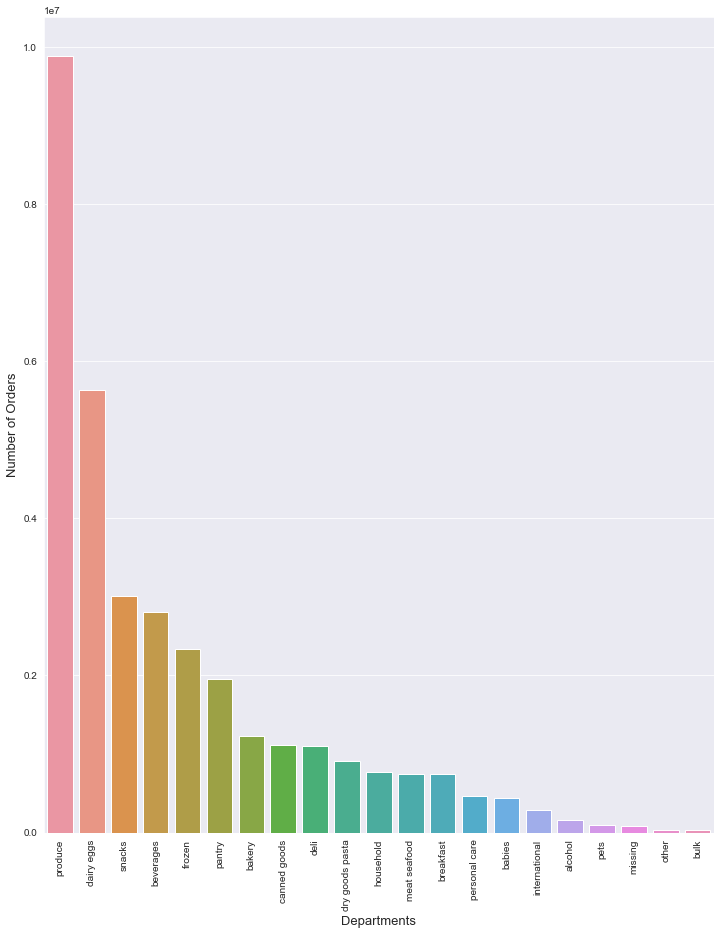

In [153]:
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(dept_sell_count.index, dept_sell_count.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

In [154]:
# produce has the highest number of orders

## Best Selling Aisles over all Departments.

In [155]:
aisle_sale_count = best_selling_depts.groupby('aisle')['order_id'].count().sort_values(ascending= False)

In [156]:
aisle_sale_count.head()

aisle
fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
Name: order_id, dtype: int64

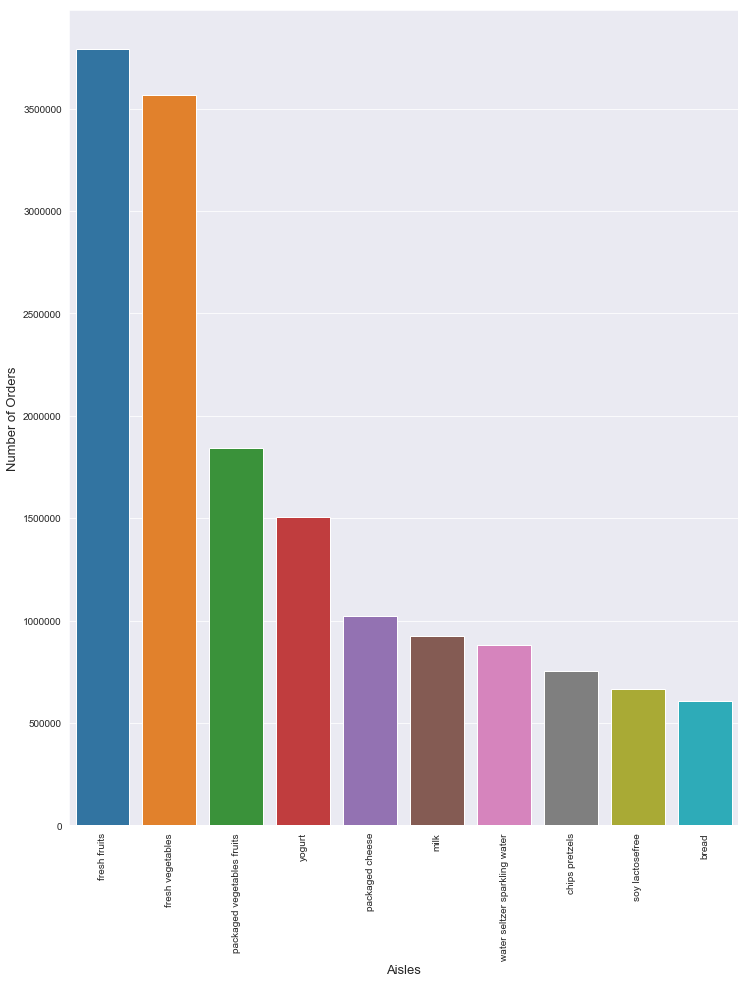

In [158]:
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(aisle_sale_count.index[:10], aisle_sale_count.values[:10])
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

In [159]:
# Looks like fresh fruit is the top aisle that has the most number of orders